# mpmath

mpmath is a project that has been around for a while in the Python numeric computing community. It is a library for arbitrary precision floating point math that received sponsorship by Google early in its development. It is a dependency of several other libraries, most notably SymPy.

### Installing the library

In [1]:
import sys
# Comment out the following line when running for the first time
# !conda install --yes --prefix {sys.prefix} mpmath

from mpmath import mp, fp, iv
import matplotlib.pyplot as plt
import time, math

### A minimal example

#### Definitions
$\pi = \int_{-\infty}^{\infty} e^{-x^2} \,dx$

$sin(x) = \sum_{n=0}^{\infty} \dfrac{(-1)^nx^{2n + 1}}{(2n + 1)!} = 1$

#### Calculations
$sin(\pi)$

$sin(\frac{\pi}{2})$

In [2]:
mp.dps = 50
# Original example
pi = mp.quad(lambda x: mp.exp(-x**2), [-mp.inf, mp.inf]) ** 2
print("Pi to 50 digits is:", pi)

# Finding sin(x) with the classic series
sin = lambda x: mp.nsum(lambda n: x**(2 * n + 1) * (-1)**n / mp.fac(2 * n + 1), [0, mp.inf])
print("sin(pi) to 50 digits is:", sin(pi))
print("sin(pi/2) to 50 digits is:", sin(pi/2))

Pi to 50 digits is: 3.1415926535897932384626433832795028841971693993751
sin(pi) to 50 digits is: 4.3348336826487079811107028625977070062245457862643e-51
sin(pi/2) to 50 digits is: 1.0


The above gets pretty close to 0 when evaluating at $x = \pi$, and gets exactly 1.0 when evaluating at $x = \dfrac{\pi}{2}$ using 50 digits of precision.

### Background

This is a general purpose library that aims to provide a very early implementation for arbitrary precision floating point math.

### History

Its head maintainer and creator is Fredrik Johansson. The project is a pure Python implementation, meaning it implements no C extensions under the hood which might be used to speed things up. It has received two major grants since it was started, one from Google to support its development in 2008, and another grant from American Institute of Mathematics in 2009.

### Major Uses

Its most notable dependent project is SymPy, which is a significant numeric computing library for Python that allows evaluation of symbolic equations. To quote its [official website](https://sympy.org)

> SymPy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python.

### Strengths

The major benefits of the library according to its users are above all its pure Python implementation, making it portable and 'lightweight', but not necessarily fast. SymPy is also built on the belief that pure Python is a strength and as such uses mpmath as its single dependency. To quote the website once again

> Python-based: SymPy is written entirely in Python and uses Python for its language.
> Lightweight: SymPy only depends on mpmath, a pure Python library for arbitrary floating point arithmetic, making it easy to use.


### Weaknesses

As a pure Python library, it can be terribly slow when compared against C-extension computing libraries for Python, which are implemented wholly in C and are able to run much closer to the machine level. The library optionally allows users to switch their number type implementations to use GMP and its wrapper gmpy, which offers a faster high precision type for numbers.

### Accuracy

Accuracy is a core feature of the library, intentionally allowing developers to specify the precision with which calculations are made. This necessarily comes with trade offs related to speed, but gives developers more control over how accurate results are.

* Who are the stakeholders?
  * Who develops the software, who uses it, who pays for it?
  * What are they looking for?
  * How do they communicate and collaborate?
  * Who uses the software?
  * Who is impacted (positively or negatively) by use of the software?
* Metrics and features
  * How do concepts like accuracy, conditioning, stability, and cost appear?
  * If the software is fast, how is "fast" defined?
  * If the software is accurate, what does accuracy mean? Could you make a plot, say accuracy vs cost? How would you label the axes to make it relevant to a stakeholder?
  * Would different stakeholders want different axes (because they care about different things)?
  * Are there modeling decisions made in the interest of good conditioning? Are there algorithmic choices made for stability?

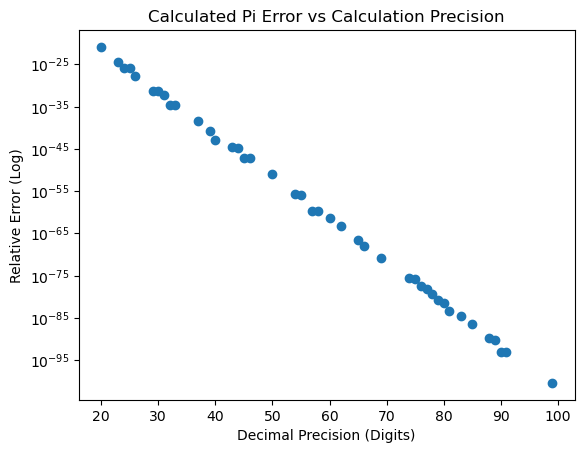

In [3]:
def time_pi(precision):
    mp.dps = precision
    start = time.monotonic()
    p = mp.quad(lambda x: mp.exp(-x**2), [-mp.inf, mp.inf]) ** 2
    end = time.monotonic()
    return p, end - start
    
mp.dps = 100
pi = mp.pi
times, errors = [], []
for i in range(20, 100):
    calc, elapsed = time_pi(i)
    mp.dps = 100
    errors.append((pi - calc)/calc)
    times.append(elapsed)

plt.scatter(range(20, 100), errors)
plt.title("Calculated Pi Error vs Calculation Precision")
plt.ylabel('Relative Error (Log)')
plt.xlabel('Decimal Precision (Digits)')
plt.yscale('log')
plt.show()

As can be seen in the above graph, the library produces minimal error in the final solution as the result of rounding, naturally proportional to the amount of precision used. The above measures the relative error against Pi measured to 100 decimal points.

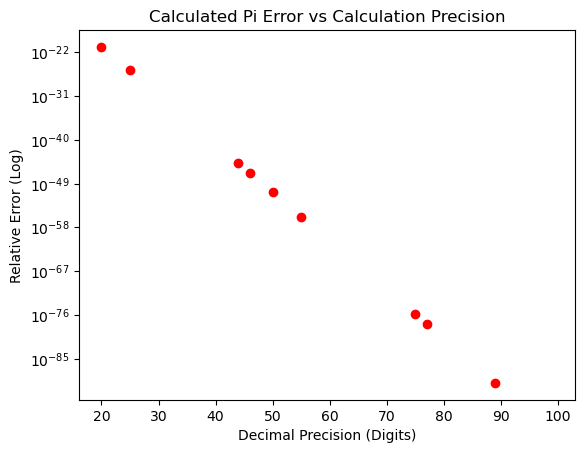

In [4]:
pi = mp.pi
times2, errors2 = [], []
for i in range(20, 100):
    calc, elapsed = time_pi(i)
    mp.dps = i
    errors2.append((pi - calc)/calc)
    times2.append(elapsed)

plt.scatter(range(20, 100), errors2, c='red')
plt.title("Calculated Pi Error vs Calculation Precision")
plt.ylabel('Relative Error (Log)')
plt.xlabel('Decimal Precision (Digits)')
plt.yscale('log')
plt.show()

The above plots points that had any error against Pi rounded to the same precision. Some calculations notably have error as a result of the method, but only a handful when comparing against the rounded value of Pi.

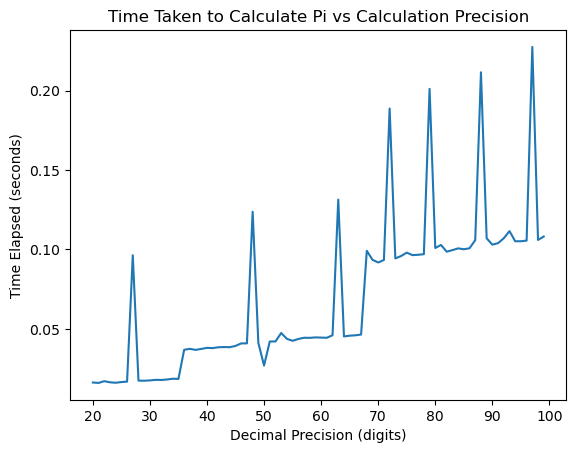

In [5]:
plt.plot(range(20, 100), times)
plt.title("Time Taken to Calculate Pi vs Calculation Precision")
plt.ylabel('Time Elapsed (seconds)')
plt.xlabel('Decimal Precision (digits)')
plt.show()

The above measures the time the calculation took in seconds against the amount of decimal precision used. As can be seen on the graph, the time appears to increase semi-linearly, with a few notable jumps in time after a certain amount of precision is reached.

### Fast Math

The library also offers a mode for performing lower accuracy 'fast math', which prioritizes speed of calculation at the cost of the accuracy of the result. It does not provide control over the absolute precision used, but instead uses Python's builtin numeric types, which are intended to be fast.

In [6]:
def time_pi_fp(precision):
    start = time.monotonic()
    p = fp.quad(lambda x: fp.exp(-x**2), [-fp.inf, fp.inf]) ** 2
    end = time.monotonic()
    return p, end - start
    
calc, elapsed = time_pi_fp(i)

print("20 Digits Precision Time Elapsed:", times[0], "seconds")
print("Fast Math Time Elapsed:", elapsed, "seconds")
print("Speedup Factor:", times[0] / elapsed)
print(f"20 Digits Precision Relative Error: {abs(errors[0])}", )
print(f"Fast Math Relative Error: {abs((pi - calc)/calc)}", )
print(f"Error Comparison Factor: {abs(((pi - calc)/calc)/errors[0])}", )

20 Digits Precision Time Elapsed: 0.016178647987544537 seconds
Fast Math Time Elapsed: 0.0004998010117560625 seconds
Speedup Factor: 32.37017854505832
20 Digits Precision Relative Error: 0.00000000000000000000128741467897512077357391736472352153666501072238656402525699249549760070334521110342807863436240801
Fast Math Relative Error: 0.00000000000000137459814010303398148210767453519443279213725444533351245740360827304896737155590956111041834680129
Error Comparison Factor: 1067719.7973207186214468049362515130984724890552101323476948255477993135778559922471200514977916867


The fast math manages a time elapsed that is smaller than the standard method by a fair margin, speeding up by a factor of 36 times when run on coding.csel.io.

The relative error is still fairly small, but still notably worse than the precision offered by 20 digits by a factor of 10e6.

### My Questions for the Project
My major question about the project is what the benefit is of using this library over the builtin `decimal` library, which was added to Python's standard library long before this library was created, and why a project like SymPy would depend on it instead of using the builtin module.

A related question I have for the community is what drives someone to use a pure Python implementation of something over something offering a C extension, and what benefits there are in a slower library implemented all in Python.

### Further Experimentation

One experiment I think could be interesting related to this is to attempt to measure the benefits of using the library. Given the library offers optionally using GMP for calculations, would most applications benefit from this switch? I think it would be interesting to take a number of different projects that depend on the library and to analyse their use cases and see whether the switch to a C extension for the numbers would speed things up significantly for the use case.

This experiment is particularly interesting to me because I often hear critiques of Python particularly regarding its speed, and I would like to see whether most projects using this library could reasonably be sped up, or whether the number types themselves at all contribute to the speed of the application. This could be applied across a number of different real world projects.

To measure this experiment, I think I would go about it by measuring the percentage speedup after switching to GMP for the run speed of a project for its various use cases. One would write some tests that would run an intensive use of the project and measure the time elapsed with and without GMP on the same hardware. It would measure average speedup as well as time elapsed with GMP vs without GMP.